<a href="https://colab.research.google.com/github/fecampos/examples/blob/main/data_analysis_for_CARS2009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip -q install xarray
! pip -q install git+https://github.com/pydap/pydap.git

import matplotlib.pyplot as plt
import getpass
%matplotlib inline

import xarray as xr
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


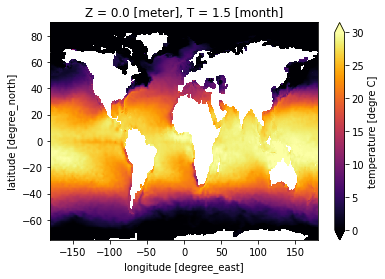

In [ ]:
file = "./CARS2009/temp_month.cdf"
ds = xr.open_mfdataset(file, parallel = True).isel(Z=0, T=1)
ds.temperature.plot(vmin=0, vmax=30, cmap="inferno")

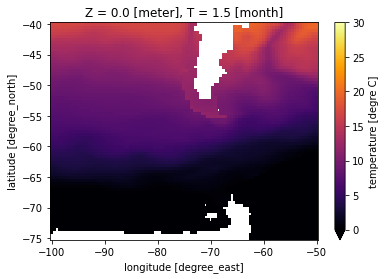

In [ ]:
ds.temperature.sel(X=slice(-100,-50), Y=slice(-75,-40)).plot(vmin=0, vmax=30, cmap="inferno")

In [13]:
USERNAME = 'fcampos'
DATASET_ID = 'cmems_mod_glo_phy_my_0.083_P1D-m'
PASSWORD = getpass.getpass('Enter your password: ')

Enter your password: ··········


In [14]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-
__author__ = "Copernicus Marine User Support Team"
__copyright__ = "(C) 2022 E.U. Copernicus Marine Service Information"
__credits__ = ["E.U. Copernicus Marine Service Information"]
__license__ = "MIT License - You must cite this source"
__version__ = "202104"
__maintainer__ = "D. Bazin, E. DiMedio, C. Giordan"
__email__ = "servicedesk dot cmems at mercator hyphen ocean dot eu"

def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits 
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    return data_store

In [40]:
data_store = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)
ds = xr.open_dataset(data_store)
ds

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 10013)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 1993-01-01T12:00:00 ... 2020-05-31T12:00:00
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
    bottomT    (time, latitude, longitude) float32 ...
    sithick    (time, latitude, longitude) float32 ...
    siconc     (time, latitude, longitude) float32 ...
    usi        (time, latitude, longitude) float32 ...
    vsi        (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/24)
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2021/09/02 23:29:48 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR GLORYS12V1
    institution:        MERCATOR OCEAN
    ...                 ...
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

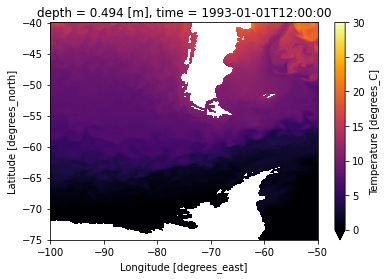

In [51]:
ds0 = ds.thetao.isel(depth=0, time=0)
ds0.sel(longitude=slice(-100,-50), latitude=slice(-75,-40)).plot(vmin=0, vmax=30, cmap="inferno")